#### Causal inference in multivariate time series

In [43]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [201]:
import random
import pathlib
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from scms import StructuralCausalModels
from renyiDAG import generate_dag_and_time_series
from TSGen import RandomCausalSimulator

np.random.seed(1)

NOnlinear Mask:
[[ True False  True]
 [False False False]
 [False False False]]
Adjacency Matrix:
[[1 0 1]
 [0 1 0]
 [0 0 1]]

Sample Data:
         Z0        Z1        Z2
0  0.411256  0.762663  0.537319
1  0.356152  0.707772  0.558460
2  0.254700  0.540006  0.491193
3  0.185382  0.449692  0.423120
4  0.125054  0.316692  0.334093


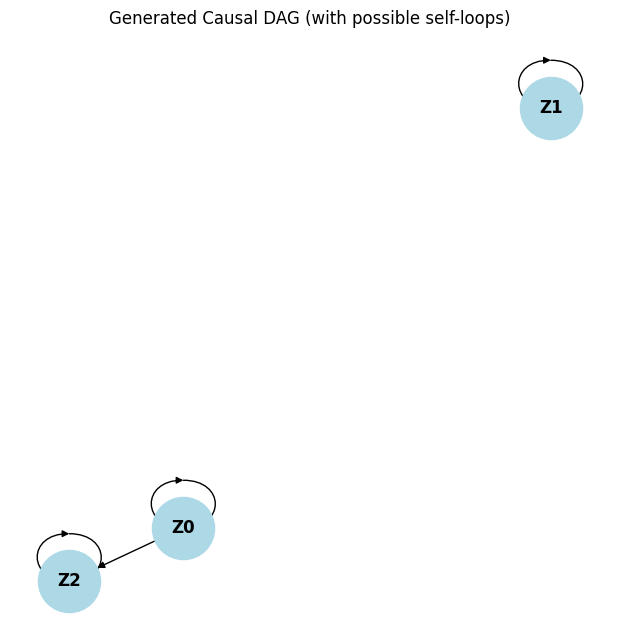

In [219]:
n_nodes = 3      # Total variables (10 variables)
edge_prob = 0.75      # Probability of edge creation
nonlinear_prob = 0.75   # Chance of nonlinearity per edge              

sim = RandomCausalSimulator(n_nodes, edge_prob, nonlinear_prob, 1.0, seed=42)
df, graph = sim.simulate()  # Only df and adj returned

print("Adjacency Matrix:")
print(graph)
print("\nSample Data:")
print(df.head())

sim.draw_dag()


<Axes: >

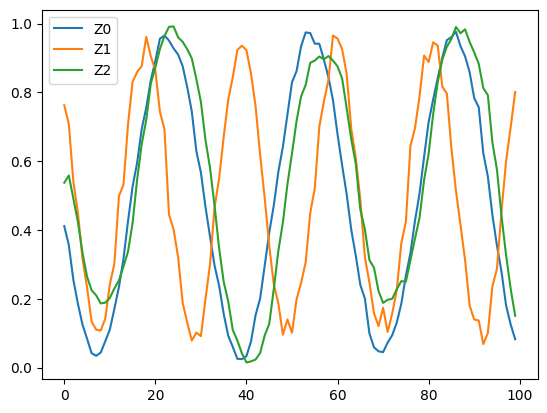

In [218]:
df.iloc[:100, ].plot()

In [189]:
df.iloc[:50, ].corr()

,Z0,Z1,Z2,Z3,Z4
Z0,1.000000,-0.196645,-0.003357,0.001149,-0.173573
Z1,-0.196645,1.000000,0.009854,0.027518,0.554658
Z2,-0.003357,0.009854,1.000000,0.985081,0.024618
Z3,0.001149,0.027518,0.985081,1.000000,0.065831
Z4,-0.173573,0.554658,0.024618,0.065831,1.000000


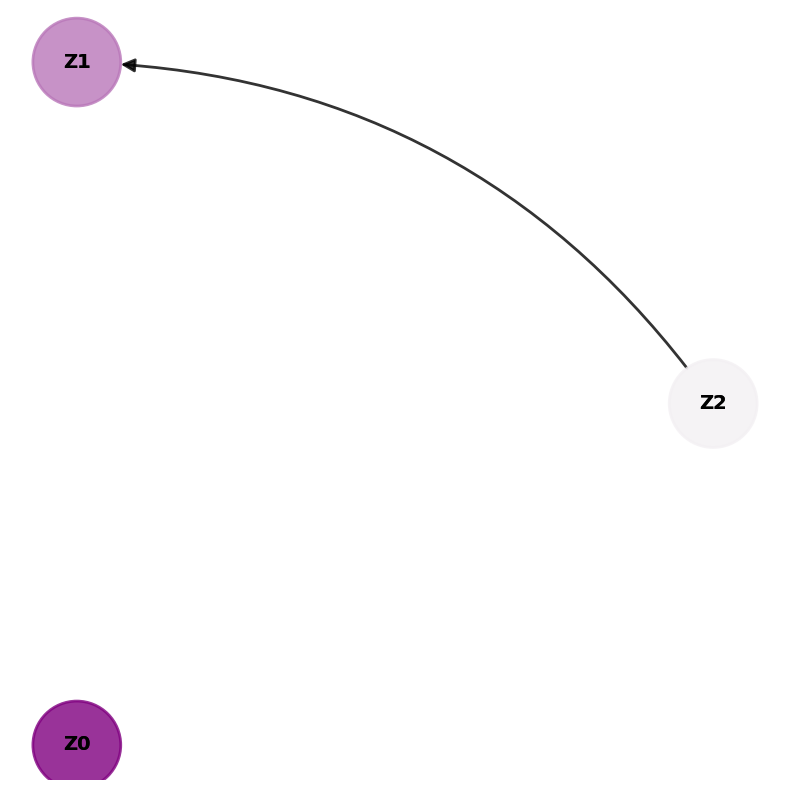

Generated Causal Matrix:
[[1 0 0]
 [0 1 0]
 [0 1 1]]

Generated Time Series Data (first few rows):
         Z0        Z1        Z2
0 -4.259748 -0.651929 -0.129825
1 -3.911874  0.386490 -0.173588
2 -3.604913 -0.509104 -0.371812
3 -3.779847  0.660964 -0.673530
4 -3.405644  0.720932 -0.548176


In [51]:
# Example Configuration:
n_nodes = 3          # Total variables (10 variables)
edge_prob = .30      # Probability of edge creation
nonlinear_prob = 0.0   # Chance of nonlinearity per edge
timesteps = 200        # Number of time steps
lag = 5                # Lag for causal effects

# Generate Data
df, causal_matrix = generate_dag_and_time_series(n_nodes, edge_prob, nonlinear_prob,
                                                     timesteps)

print("Generated Causal Matrix:")
print(causal_matrix)
print("\nGenerated Time Series Data (first few rows):")
print(df.head())

<Axes: >

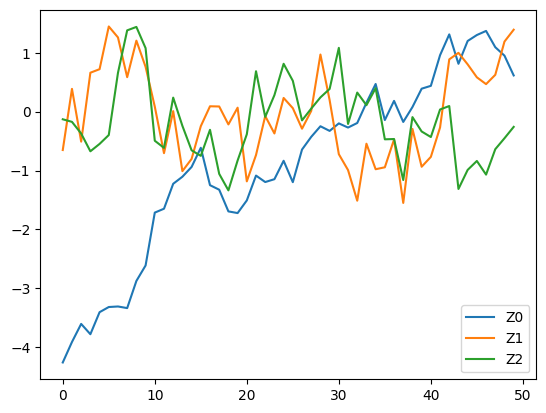

In [52]:
df.iloc[:50, :].plot()

In [53]:
df.corr()

,Z0,Z1,Z2
Z0,1.00000,0.016330,-0.007440
Z1,0.01633,1.000000,0.211841
Z2,-0.00744,0.211841,1.000000


In [10]:
# Modify the code for complete experiments
plot_path = r"../plots/"
edge_densities = np.arange(0.2, 0.3, 0.1)
etests = len(edge_densities)
group_sizes = np.arange(3, 8, 2)
# group_sizes = np.array([6])
gtests = len(group_sizes)
res_all = []

for g in range(etests):

    edge_density = edge_densities[g]
    res = np.zeros((3, 3))

    for t in range(gtests):

        nodes = group_sizes[t]
        params = {'g_one_start': 0,
                  'g_one_end': int(nodes/2),
                  'g_two_start': int(nodes/2),
                  'g_two_end': nodes
                 }

        dag = StructuralCausalModels(nodes, edge_density)
        df = dag.df



In [11]:
df

,Z1,Z2,Z3,Z4,Z5,Z6,Z7
0,0.453348,0.436025,-0.763606,-0.028544,1.720200,-0.650067,-1.308243
1,2.176822,1.772313,0.949379,2.944266,1.242207,1.162728,-0.195960
2,1.553103,2.194483,1.326759,1.344620,3.368614,5.445869,-2.321817
3,1.603594,1.475123,1.187626,0.840459,3.172912,-0.810862,1.910857
4,1.044651,0.492315,2.640046,1.388251,-0.162322,1.222865,2.770226
...,...,...,...,...,...,...,...
1995,1.690050,2.121014,0.247932,-0.767562,2.701290,0.040617,1.007946
1996,1.882140,2.555930,2.903855,1.875142,-1.138655,4.058159,-0.580152
1997,1.086196,2.093573,1.078129,-0.488059,5.400507,3.933600,-0.289859
1998,0.778784,1.663261,2.354036,-0.486425,1.502824,-0.359302,0.743826


In [13]:
dag.binary_matrix

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

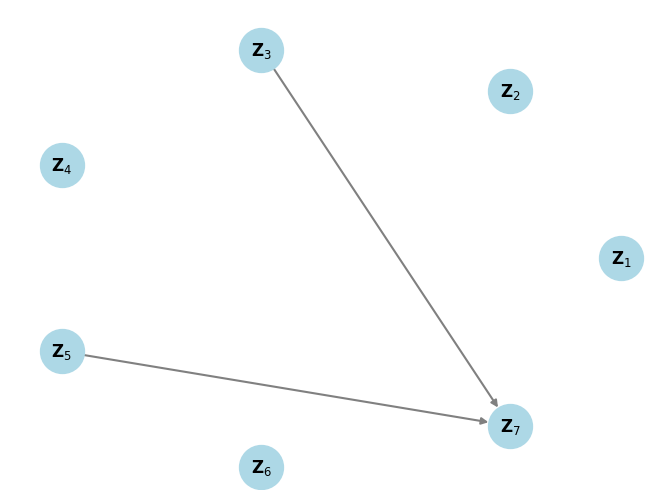

In [12]:
dag.draw_DAG()

In [ ]:
df.corr()